# PDEs 2

In [1]:
from IPython.display import Image
from numpy import *
import time

## Successive over-relaxation (SOR) method

We can make the code run faster. We introduce a weight parameter

Previously
$$
\phi_1(x,y)=\phi(x,y)+\Delta \phi(x,y),
$$

Now
$$
\phi_1(x,y)=\phi(x,y)+(1+\omega) \Delta \phi(x,y),
$$
with $\omega>0$.

We introduce the weight in the original matrix

$$
\phi(x,y) \leftarrow \frac{1+\omega}{4} \left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] -\omega \phi(x,y)
$$

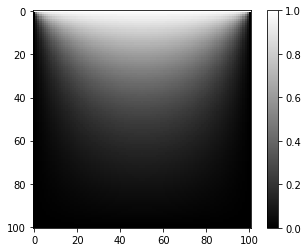

In [3]:
from pylab import *
M,V=100,1.0
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
delta=1.0
omega=0.9
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j]=phi[i,j] 
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] \
                                      + phi[i-1,j] + phi[i,j+1] \
                                      + phi[i,j-1])/4 - omega*phi[i,j]
    
imshow(phi)
gray()
colorbar()
show()

In [4]:
phi

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.99890541e-01, 6.97433741e-01, ...,
        6.97433770e-01, 4.99890556e-01, 0.00000000e+00],
       [0.00000000e+00, 3.02128424e-01, 4.99562166e-01, ...,
        4.99562224e-01, 3.02128453e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.18967316e-04, 4.37709098e-04, ...,
        4.37730280e-04, 2.18978151e-04, 0.00000000e+00],
       [0.00000000e+00, 1.09427305e-04, 2.18741919e-04, ...,
        2.18752406e-04, 1.09432669e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Consider the next 2d box with these interior plates

![title](fig_4.png)

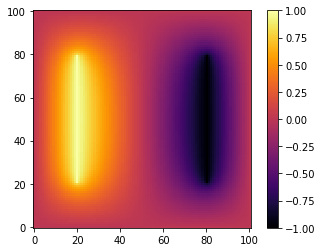

--- 21.948073148727417 seconds ---


In [5]:
from pylab import *
import time

t0 = time.time()
M,V=100,0

def V0(x,y):
    if j==20 and i>20 and i<80:
        return 1
    elif j==80 and i>20 and i<80:
        return -1
    else:
        return 0

maxIter = 500
phi=zeros([M+1,M+1],float)
epsilon=8.85e-12
omega = 0.5 #this is variable, only trial and error will find a good value
for iteracion in range(0, maxIter):
    for i in range(M+1):
        for j in range(M+1):
            myV=V0(i,j)
            
            if i==0 or i==M or j==0 or j==M:
                phi[i,j]=V
            elif myV != 0:
                phi[i,j] = myV
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 \
                 -omega*phi[i,j]
   
imshow(phi,origin='lower')
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s seconds ---" % (time.time()  -  t0))

## Numerov method

Useful for DEs of the form

$ \frac{d^2 y}{dx^2} = - g(x) y(x) + s(x). $

We take 3 values $ y_{n-1}, y_n, y_{n+1} $ using equidistant points $ x_{n-1}, x_n, x_{n+1} $. They're related via


$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1}\right) = 2 y_n \left(1 - \frac{5 h^2}{12} g_n\right) - y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1}\right) + \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6),$

Where:

$y_n = y(x_n) $, $ g_n = g(x_n)$, $ s_n = s(x_n) $ y $ h = x_{n+1} - x_n$

## Quantum harmonic oscillator
We plot the first 5 solutions of the quantum harmonic oscillatior

$$(-h^2/2m)(d^2/dx^2)(\phi) + (1/2)m(\omega_0^2)\phi x^2=E$$

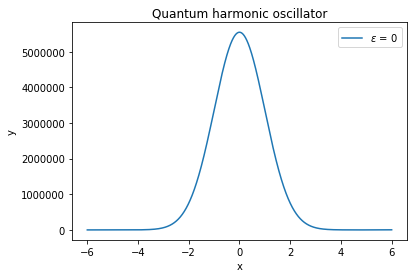

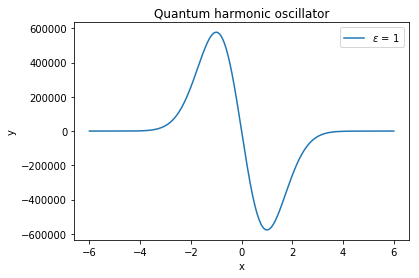

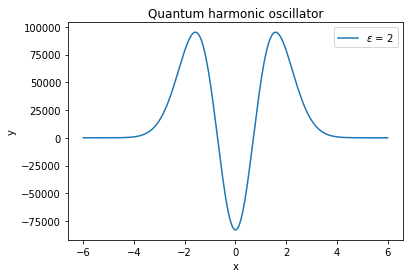

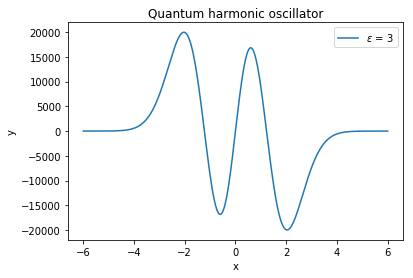

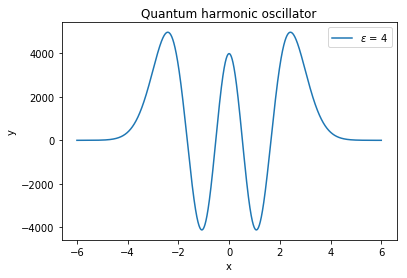

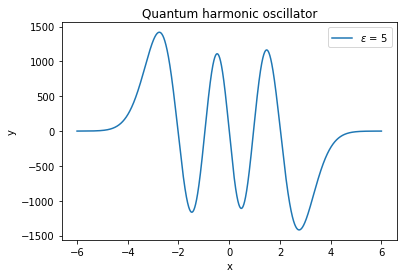

In [6]:
from pylab import *


N = 60000 # iterations

h = 0.0001
h2 = h**2

for i in range(6):
    n=i
    epsilon=n+0.5

    y = 0.0 
    g = 0.0
    x = -1*(N-2)*h

    g_0 = epsilon + x-2*h # k_0
    g_1 = epsilon + x-h # k_1
    y_0 = 0 # boundary conditions
    y_1 = h 

    x_lista = []
    y_lista = []


    contador=-1*N+2

    while contador<N-2:
        contador+=1
        x += h
        g = 2*epsilon - x**2
        b = h2/12
        y = ( 2*(1-5*b*g_1) * y_1 - (1+b*g_0) * y_0 ) / (1 + b * g)

        x_lista.append(x)
        y_lista.append(y)

        #Variable update
        y_0 = y_1
        y_1 = y
        g_0 = g_1
        g_1 = g


    plot(x_lista, y_lista, label="$\epsilon$ = %d" %n)
    xlabel("x")
    ylabel("y")
    title("Quantum harmonic oscillator")
    legend()
    show()

## Heat equation

$$
\frac{\partial\phi(\mathbf{r},t)}{\partial t} = D\nabla^2\phi(\mathbf{r},t)
$$

In one dimension

$$
\frac{\partial\phi(x,t)}{\partial t} = D\frac{\partial^2 \phi(x,t)}{\partial x^2}
$$

### The FTCS method

FTCS = Forward-Time Centered-Space 



With central finite differences

$$
\frac{\partial^2 \phi(x,t)}{\partial x^2}= \frac{\phi(x+a,t)-\phi(x-a,t)+2\phi(x,t)}{a^2}
$$

Using the Euler method for time

$$
\frac{d\phi}{d t} = f(\phi,t)
$$

$$
\phi(t+h) \approx \phi(t) + h\frac{d\phi}{d t} =  \phi(t) + h f(\phi,t)
$$

We have

$$
\phi(x,t+h)  = \phi(x,t) + h \frac{D}{a^2} \left[\phi(x+a,t)-\phi(x-a,t)+2\phi(x,t)\right]
$$


![title](fig_5.jpg)

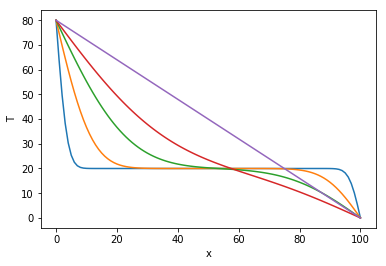

--- 10.193806171417236 seconds ---


In [7]:
from pylab import *
import time

t0 = time.time()
L=0.01
D=4.25e-6
M=100
A=L/M
h=1e-4 #time steps
epsilon=h/1000
T_baja=0.0
T_media=20.0
T_alta=80.0
t1=0.01
t2=0.1
t3=0.4
t4=1.0
t5=100.0
tfinal=t5+epsilon
T=empty(M+1,float)
T[0]=T_alta
T[M]=T_baja
T[1:M]=T_media
Tp=empty(M+1,float)
Tp[0]=T_alta
Tp[M]=T_baja
Tp[1:M]=T_media
t=0.0
c=h*D/(A*A)
while t<tfinal:
    Tp[1:M]=T[1:M]+c*(T[2:M+1]+T[0:M-1]-2*T[1:M])
    T,Tp=Tp,T
    t+=h
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)
xlabel('x')
ylabel('T')
show()
print("--- %5s seconds ---" % (time.time()  -  t0))

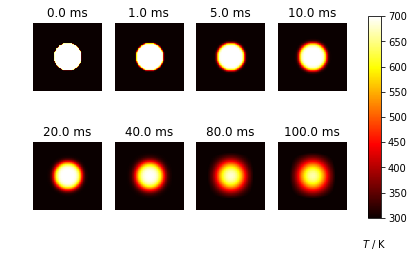

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

def Geom_sis(r,cx,cy):
    r2=r**2
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
                u0[i,j] = Tcaliente
    return u0

def FTCS(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Metallic plate
lx = ly = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1 #1
# Thermal diffusivity of steel, mm2.s-1
D = 4.
#Temperatures 
Tfrio, Tcaliente = 300, 700

nx, ny = int(lx/dx), int(ly/dy)

dt=1e-4
dx2, dy2 = dx*dx, dy*dy
#dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tfrio * np.ones((nx, ny))
u = np.empty((nx, ny))


u0=Geom_sis(2,5,5)
u0, u = FTCS(u0, u)

pasos = 1100
mfig = [0, 10, 50, 100, 200, 400, 800, 1000]
fignum = 0
fig = plt.figure()
for i in range(pasos):
    u0, u = FTCS(u0, u)
    if i in mfig:
        fignum += 1
        ax = fig.add_subplot(240 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tfrio,vmax=Tcaliente)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(i*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()
